In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter    
import os
import string
import argparse
import operator

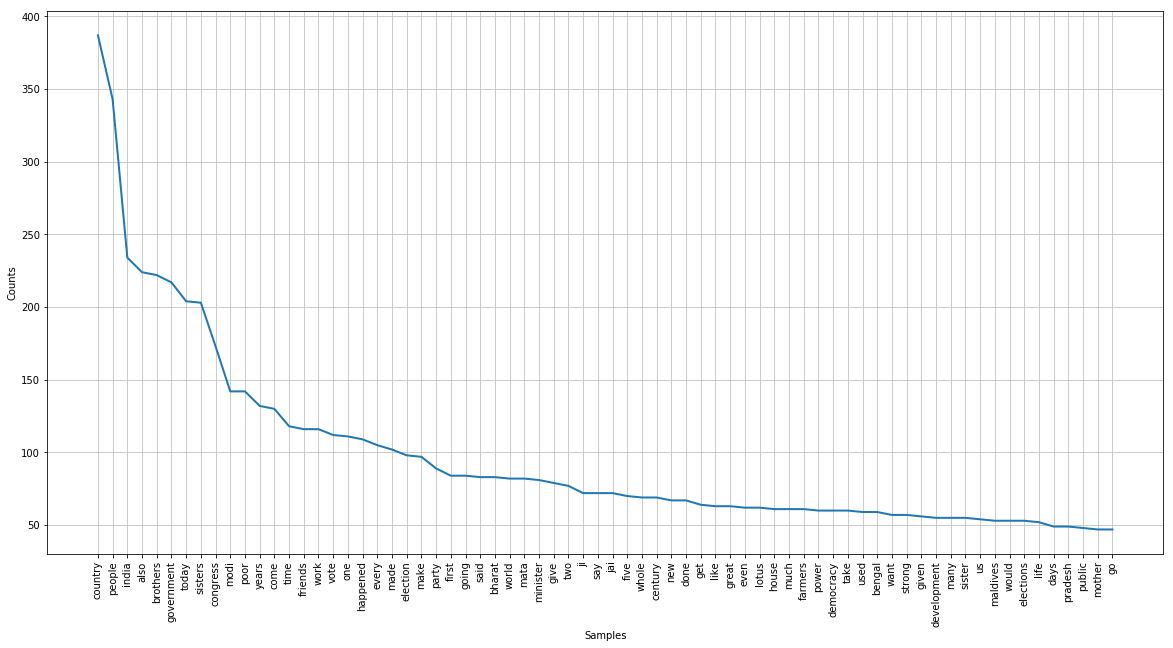

In [2]:
log = open("text.txt", "r")

#print(log.read())

tokenized_word = word_tokenize(log.read().lower())
#print(tokenized_word)

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
items = [',', '.','...','-',':',';','?',"'s"]

l = list(stop_words)

for x in items:
    l.append(x)


filtered_sentence = []
for w in tokenized_word:
    if w not in l:
        filtered_sentence.append(w)
        

#print(filtered_sentence)

fdist = FreqDist(filtered_sentence)
plt.figure(figsize=(20,10))
fdist.plot(70,cumulative=False)
plt.show()

In [3]:
data = ' '.join(filtered_sentence)

fout = open('text_new1.txt', "a")
fout.write(data)
fout.close()

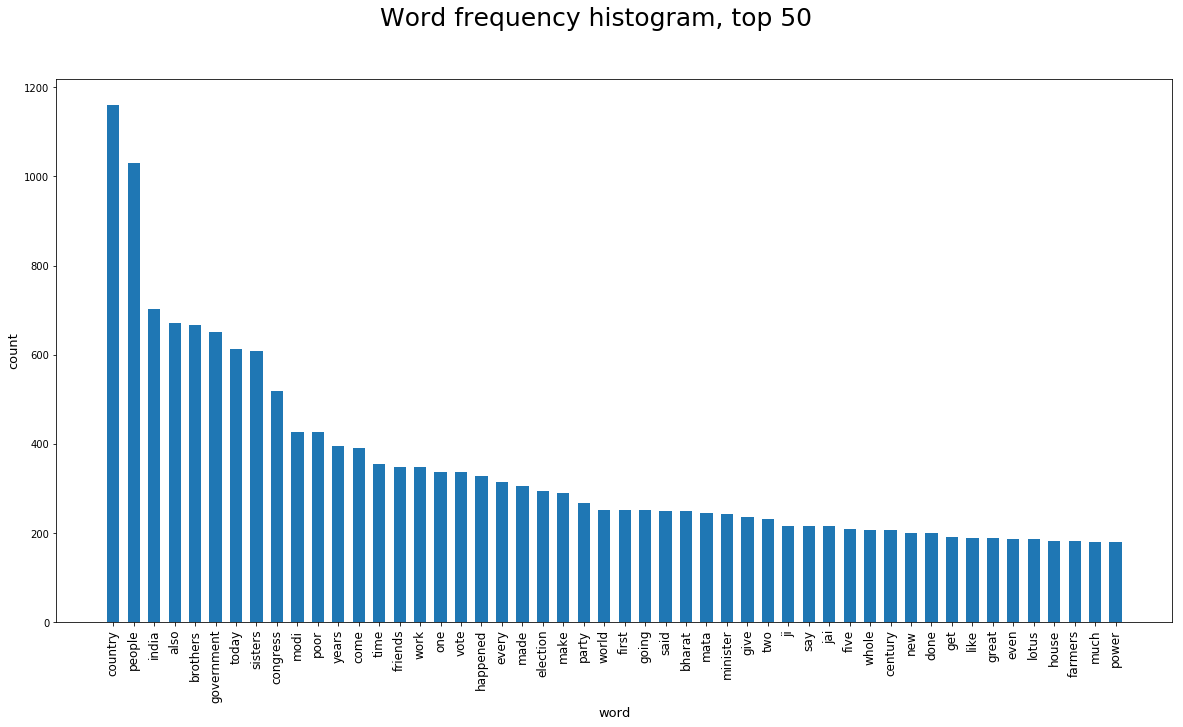

In [4]:
def main():
    
    parser = argparse.ArgumentParser(description=__doc__, formatter_class=argparse.RawDescriptionHelpFormatter)
    parser.add_argument('-f','--filepath',dest='filepath',metavar='file path',help='Path to text input file to be analysed.', required=True)
    parser.add_argument('-n','--number',dest='number',metavar='number',help='Most frequent n words will be displayed and plotted.', required=False, default=50, type=int)
    args = parser.parse_args()
    
    # Path to text file to analyse
    rawfilepath = args.filepath
    
    # Print a histogram containing the top N words, and print them and their counts.
    top_n = args.number
    
    # Load the file
    filepath = os.path.normpath(os.path.join(rawfilepath))
    file = open('text_new1.txt')
    
    # Parse as a list, removing lines
    content_sublists = [line.split(',') for line in file.readlines()]
    
    # Parse into a single list (from a list of lists)
    content_list = [item for sublist in content_sublists for item in sublist]
    
    # Remove whitespace so we can concatenate appropriately, and unify case
    content_list_strip = [str.strip().lower() for str in content_list]
    
    # Concatenate strings into a single string
    content_concat = ' '.join(content_list_strip)
    
    # Remove punctuation and new lines
    punct = set(string.punctuation)
    unpunct_content = ''.join(x for x in content_concat if x not in punct)
    
    # Split string into list of strings, again
    word_list = unpunct_content.split()
    
    # Perform count
    counts_all = Counter(word_list)
    
    words, count_values = zip(*counts_all.items())
    
    # Sort both lists by frequency in values (Schwartzian transform) - thanks, http://stackoverflow.com/questions/9543211/sorting-a-list-in-python-using-the-result-from-sorting-another-list
    values_sorted, words_sorted = zip(*sorted(zip(count_values, words), key=operator.itemgetter(0), reverse=True))
    
    # Top N
    words_sorted_top = words_sorted[0:top_n]
    values_sorted_top = values_sorted[0:top_n]
    '''
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print("{0} unique words identified in the text file, {1}".format(len(values_sorted), filepath))
    print("The top {0} words are: \n{1}".format(top_n, words_sorted_top))
    print("... their respective frequencies: \n{0}".format(values_sorted_top))
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    # Pandas DataFrame just for visualisation
    df = pd.DataFrame({'count': values_sorted_top, 'word': words_sorted_top})
    print("{0}".format(df))
    sys.stdout.flush()
    '''
    # Histogram
    
    # Make xticklabels comprehensible by matplotlib
    xticklabels = str(list(words_sorted_top)).split()
    # Remove the single quotes, commas and enclosing square brackets
    xtlabs = [xstr.replace("'","").replace(",","").replace("]","").replace("[","") for xstr in xticklabels]
    
    indices = np.arange(len(words_sorted_top))
    width = 0.6
    fig = plt.figure(figsize=(20,10))
    fig.suptitle('Word frequency histogram, top {0}'.format(top_n), fontsize=25)
    plt.xlabel('word', fontsize=13)
    plt.ylabel('count', fontsize=13)
    plt.bar(indices, values_sorted_top, width)
    plt.xticks(indices, xtlabs, rotation='vertical', fontsize=12)
    plt.show()
    
if __name__ == '__main__':
    main()
    

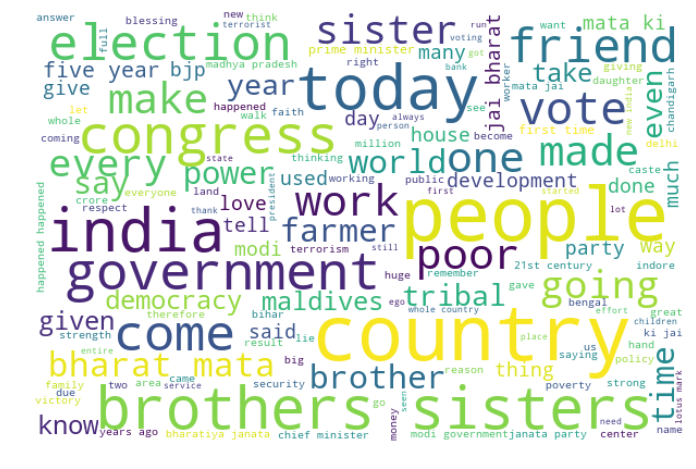

In [5]:
# Display the generated image:
wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white", width = 600, height=400).generate(' '.join(filtered_sentence))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()